In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Data Profiling
Data profiling is the process of examining, analyzing, and creating useful summaries of data.

House Dataset Data Profiling

In [ ]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Data Cleaning
From data profiling above we can see there is no missing value or anomaly in our dataset. So we can take a conclusion that our dataset is clean.


## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


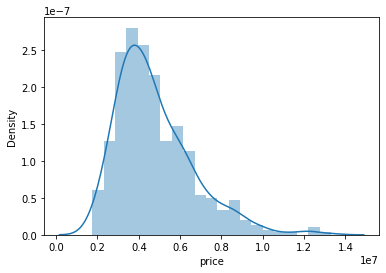

In [ ]:
sns.distplot(df['price']);

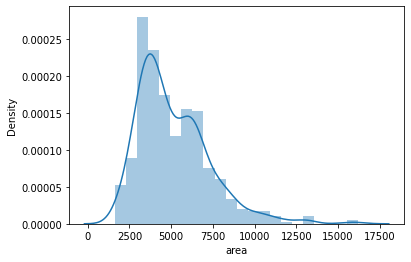

In [ ]:
sns.distplot(df['area']);

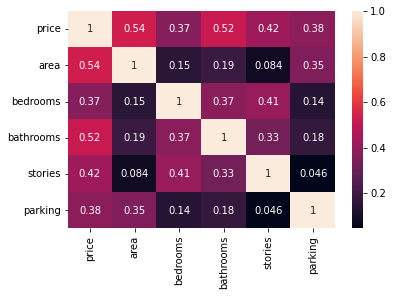

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True)

From the heatmap above we can see there is no multicolinear between the independent variables.

## Feature Engineering
Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.

There are some method we can use:
- One Hot Encodeing
- MinMax Scaler
- MAP

**One Hot Encoding**

One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.

This type of encoding creates a new binary feature for each possible category and assigns a value of 1 to the feature of each sample that corresponds to its original category. 

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# mainroad
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
mainroad_enc = pd.get_dummies(df['mainroad'], prefix = 'mainroad', drop_first = False)
mainroad_enc.head()

,mainroad_no,mainroad_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df = df.drop(['mainroad'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished


In [ ]:
df = pd.concat([df,mainroad_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,0,1
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,0,1
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,0,1
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,0,1
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,0,1


In [ ]:
# guestroom
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
guestroom_enc = pd.get_dummies(df['guestroom'], prefix = 'guestroom', drop_first = False)
guestroom_enc.head()

,guestroom_no,guestroom_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
df = df.drop(['guestroom'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes
0,13300000,7420,4,2,3,no,no,yes,2,yes,furnished,0,1
1,12250000,8960,4,4,4,no,no,yes,3,no,furnished,0,1
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished,0,1
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished,0,1
4,11410000,7420,4,1,2,yes,no,yes,2,no,furnished,0,1


In [ ]:
df = pd.concat([df,guestroom_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes
0,13300000,7420,4,2,3,no,no,yes,2,yes,furnished,0,1,1,0
1,12250000,8960,4,4,4,no,no,yes,3,no,furnished,0,1,1,0
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished,0,1,1,0
4,11410000,7420,4,1,2,yes,no,yes,2,no,furnished,0,1,0,1


In [ ]:
# basement
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [ ]:
basement_enc = pd.get_dummies(df['basement'], prefix = 'basement', drop_first = False)
basement_enc.head()

,basement_no,basement_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
df = df.drop(['basement'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes
0,13300000,7420,4,2,3,no,yes,2,yes,furnished,0,1,1,0
1,12250000,8960,4,4,4,no,yes,3,no,furnished,0,1,1,0
2,12250000,9960,3,2,2,no,no,2,yes,semi-furnished,0,1,1,0
3,12215000,7500,4,2,2,no,yes,3,yes,furnished,0,1,1,0
4,11410000,7420,4,1,2,no,yes,2,no,furnished,0,1,0,1


In [ ]:
df = pd.concat([df,basement_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes
0,13300000,7420,4,2,3,no,yes,2,yes,furnished,0,1,1,0,1,0
1,12250000,8960,4,4,4,no,yes,3,no,furnished,0,1,1,0,1,0
2,12250000,9960,3,2,2,no,no,2,yes,semi-furnished,0,1,1,0,0,1
3,12215000,7500,4,2,2,no,yes,3,yes,furnished,0,1,1,0,0,1
4,11410000,7420,4,1,2,no,yes,2,no,furnished,0,1,0,1,0,1


In [ ]:
# hotwaterheating
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [ ]:
hotwaterheating_enc = pd.get_dummies(df['hotwaterheating'], prefix = 'hotwaterheating', drop_first = False)
hotwaterheating_enc.head()

,hotwaterheating_no,hotwaterheating_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df = df.drop(['hotwaterheating'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes
0,13300000,7420,4,2,3,yes,2,yes,furnished,0,1,1,0,1,0
1,12250000,8960,4,4,4,yes,3,no,furnished,0,1,1,0,1,0
2,12250000,9960,3,2,2,no,2,yes,semi-furnished,0,1,1,0,0,1
3,12215000,7500,4,2,2,yes,3,yes,furnished,0,1,1,0,0,1
4,11410000,7420,4,1,2,yes,2,no,furnished,0,1,0,1,0,1


In [ ]:
df = pd.concat([df,hotwaterheating_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes
0,13300000,7420,4,2,3,yes,2,yes,furnished,0,1,1,0,1,0,1,0
1,12250000,8960,4,4,4,yes,3,no,furnished,0,1,1,0,1,0,1,0
2,12250000,9960,3,2,2,no,2,yes,semi-furnished,0,1,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,3,yes,furnished,0,1,1,0,0,1,1,0
4,11410000,7420,4,1,2,yes,2,no,furnished,0,1,0,1,0,1,1,0


In [ ]:
# airconditioning
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [ ]:
airconditioning_enc = pd.get_dummies(df['airconditioning'], prefix = 'airconditioning', drop_first = False)
airconditioning_enc.head()

,airconditioning_no,airconditioning_yes
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
df = df.drop(['airconditioning'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes
0,13300000,7420,4,2,3,2,yes,furnished,0,1,1,0,1,0,1,0
1,12250000,8960,4,4,4,3,no,furnished,0,1,1,0,1,0,1,0
2,12250000,9960,3,2,2,2,yes,semi-furnished,0,1,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,yes,furnished,0,1,1,0,0,1,1,0
4,11410000,7420,4,1,2,2,no,furnished,0,1,0,1,0,1,1,0


In [ ]:
df = pd.concat([df,airconditioning_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
0,13300000,7420,4,2,3,2,yes,furnished,0,1,1,0,1,0,1,0,0,1
1,12250000,8960,4,4,4,3,no,furnished,0,1,1,0,1,0,1,0,0,1
2,12250000,9960,3,2,2,2,yes,semi-furnished,0,1,1,0,0,1,1,0,1,0
3,12215000,7500,4,2,2,3,yes,furnished,0,1,1,0,0,1,1,0,0,1
4,11410000,7420,4,1,2,2,no,furnished,0,1,0,1,0,1,1,0,0,1


In [ ]:
# prefarea
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [ ]:
prefarea_enc = pd.get_dummies(df['prefarea'], prefix = 'prefarea', drop_first = False)
prefarea_enc.head()

,prefarea_no,prefarea_yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
df = df.drop(['prefarea'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1


In [ ]:
df = pd.concat([df,prefarea_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0


**Map**

This method converting the ordinal categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.

In [ ]:
# furnishingstatus
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':0, 'semi-furnished':1, 'unfurnished': 2})

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,0,1,0,1,0,1,1,0,0,1,1,0


**MinMax Scaler**

MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# area
df[['area']] = scaler.fit_transform(df[['area']])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,0.396564,4,2,3,2,0,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,0.502405,4,4,4,3,0,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,0.571134,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,0.402062,4,2,2,3,0,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,0.396564,4,1,2,2,0,0,1,0,1,0,1,1,0,0,1,1,0


## Preprocessing Data

Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models. In simple words, data preprocessing in Machine Learning is a data mining technique that transforms raw data into an understandable and readable format. 

- Feature importance 

> Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
X

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.396564,4,2,3,2,0,0,1,1,0,1,0,1,0,0,1,0,1
1,0.502405,4,4,4,3,0,0,1,1,0,1,0,1,0,0,1,1,0
2,0.571134,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1
3,0.402062,4,2,2,3,0,0,1,1,0,0,1,1,0,0,1,0,1
4,0.396564,4,1,2,2,0,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,2,1,1,2,2,0,1,1,0,0,1,1,0,1,0,1,0
541,0.051546,3,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
542,0.135395,2,1,1,0,2,0,1,1,0,1,0,1,0,1,0,1,0
543,0.086598,3,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
# define the model
model = LinearRegression()

In [ ]:
# fit the model
model.fit(X,y)

LinearRegression()

In [ ]:
# get importance
importance = model.coef_

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f'%(i,v))

Feature: 0, Score: 3548845.20976
Feature: 1, Score: 119474.38647
Feature: 2, Score: 988888.28730
Feature: 3, Score: 450391.51760
Feature: 4, Score: 279785.63739
Feature: 5, Score: -213187.78146
Feature: 6, Score: -211550.37058
Feature: 7, Score: 211550.37058
Feature: 8, Score: -149015.25339
Feature: 9, Score: 149015.25339
Feature: 10, Score: -178963.18002
Feature: 11, Score: 178963.18002
Feature: 12, Score: -436468.01357
Feature: 13, Score: 436468.01357
Feature: 14, Score: -426816.79744
Feature: 15, Score: 426816.79744
Feature: 16, Score: -323527.79936
Feature: 17, Score: 323527.79936


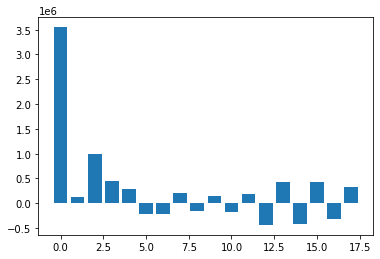

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

As we can see from the chart above, there are negative and positive coefficient value. And we will use the positive coefficient.

- Feature Selection

> In this case we will drop the negative coefficient.

In [ ]:
X.drop('furnishingstatus',axis=1,inplace=True)
X.drop('mainroad_no',axis=1,inplace=True)
X.drop('guestroom_no',axis=1,inplace=True)
X.drop('basement_no',axis=1,inplace=True)
X.drop('hotwaterheating_no',axis=1,inplace=True)
X.drop('airconditioning_no',axis=1,inplace=True)
X.drop('prefarea_no',axis=1,inplace=True)

- Train and Test Split

The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

## Machine Learning Regression - Multiple Linear Regression

- Fitting into Training

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

- Predict The Result

In [ ]:
y_predict = regressor.predict(X_test)

- Plot The Result

In [ ]:
result = pd.DataFrame({'Actual':y_test,'Predict':y_predict})

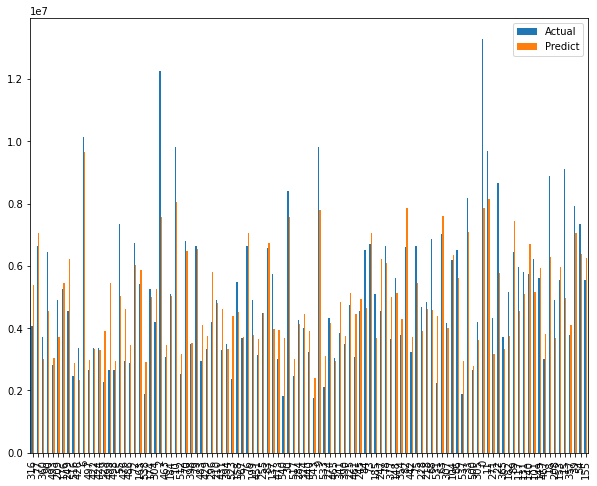

In [ ]:
result.plot(kind='bar',figsize=(10,8))
plt.show()

## Evaluate Model
the process of using different evaluation method to understand a machine learning model's performance, as well as its strengths and weaknesses.

The Mean Absolute Percentage Error (MAPE) is the sum of the individual absolute errors divided by the demand (each period separately). It is the average of the percentage errors.

In [ ]:
mean_absolute_percentage_error(y_test,y_predict)

0.21702430525854904